# 3. Regresión Logística
Entrenaremos usando scikit-learn una regresión logística para clasificar dígitos manuscritos.

# Contents
- [1.DataSet](#1.DataSet)
- [2.Entrenamiento y Validacion](#2.Entrenamiento-y-Validacion)
- [3.Definicion y entrenamiento del modelo](#3.Definicion-y-entrenamiento-del-modelo)
- [4.Evaluacion del modelo](#4.Evaluacion-del-modelo)
- [Ejercicios](#Ejercicios)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np 
np.set_printoptions(suppress=True) #no usar notacion exponencial

## 1.DataSet

Usaremos el ["digits dataset"](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) que viene con scikit-learn.<br>
<br>
Each datapoint is a 8x8 image of a digit


In [2]:
from sklearn import datasets

#cargamos el dataset enter
digits = datasets.load_digits()
type(digits),digits.data.shape


(sklearn.utils.Bunch, (1797, 64))

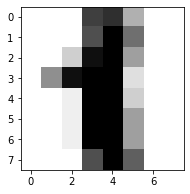

In [3]:
# display de first digit
plt.figure(1, figsize=(3,3))
plt.imshow(digits.images[1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

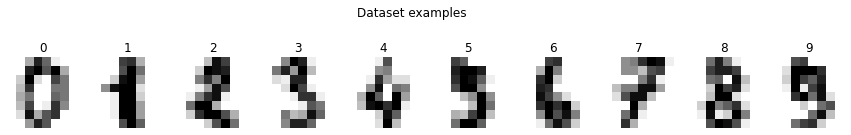

In [4]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(15, 2.5))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    #ax.set_title("Training: %i" % label)
    ax.set_title(label)

plt.suptitle('Dataset examples')
plt.show()

In [5]:
digits.target[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
# cada "imagen" es un array (matriz) de 8x8 en donde cada celda corresponde un pixel 
digits.images[1]

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [7]:
# Cargamos sólo vectores X e y:
# vamos a utilizar la convencion de que:
#   X: contiene los datos 
#   y: contiene los valores verdaderos (tambien llamadas ETIQUETAS)

X, y = datasets.load_digits(return_X_y=True)

In [8]:
# X es un array que tiene 1797 observaciones (filas) y 64 columnas.
# cada columna corresponde a un pixel de la imagen.
# cada celda contiene un valor de 0 a 16 que representa la intensidad de ese pixel en la imagen
X.shape

(1797, 64)

In [9]:
# la variable y es un array de 1797 observaciones (columnas) 
# que tiene los valores verdaderos (o las etiquetas) de las imagenes almacenadas en X
y[:9],y.shape

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), (1797,))

In [10]:
print(f'La matriz (array)\n\n{X[0]}\n\n representa al numero {y[0]}')

La matriz (array)

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]

 representa al numero 0


In [11]:
# Cuántas imágenes hay para cada dígito?
from collections import Counter
Counter(y)
# Esta es una funcion muy util para evaluar que cantidad de observaciones tenemos para cada clase.

Counter({0: 178,
         1: 182,
         2: 177,
         3: 183,
         4: 181,
         5: 182,
         6: 181,
         7: 179,
         8: 174,
         9: 180})

## 2.Entrenamiento y Validacion

Dividiremos aleatoriamente los datos en una parte para entrenamiento (80%) y otra para evaluación (20%).

Usaremos 
[train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) de scikit-learn:

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=0) 

In [13]:
X_train.shape, X_val.shape

((1437, 64), (360, 64))

## 3.Definicion y entrenamiento del modelo

In [14]:
from sklearn.linear_model import LogisticRegression

# Definimos el modelo
model = LogisticRegression() # en primera instancia NO modificamos ningun parametro (atributo)

# Entrenamos el modelo
model.fit(X_train, y_train) # En esta instancia el modelo es "alimentado" con los datos de entrenamiento y las etiquetas

c:\users\nico.-\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Inspeccionar Parámetros

In [15]:
model.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
# coef_[i, j] es el score que aporte el feature j a la clase i
model.coef_

array([[ 0.        , -0.00481055, -0.07125191,  0.09967566,  0.03678739,
        -0.09590434, -0.10801524, -0.00931637, -0.00009193, -0.04894419,
        -0.01368792,  0.15079321,  0.08517038,  0.08968538, -0.0371555 ,
        -0.00698259, -0.00002545,  0.04703136,  0.14807468, -0.0261566 ,
        -0.32116716,  0.19757049,  0.09082348, -0.00179109, -0.00001259,
         0.11392941,  0.11830185, -0.19077172, -0.49271053,  0.02846844,
         0.07748874, -0.00042589,  0.        ,  0.13087884,  0.11104784,
        -0.18240873, -0.39935769,  0.02827369,  0.0425763 ,  0.        ,
        -0.00094019, -0.05036513,  0.25935548, -0.1100199 , -0.16961014,
         0.11515413,  0.01738826, -0.00056268, -0.00328804, -0.1000517 ,
         0.08527656, -0.01313448,  0.17065788,  0.08146484, -0.05294094,
        -0.00675119, -0.00001531, -0.00898164, -0.09780433,  0.16501645,
        -0.03330174, -0.07810348, -0.06718667, -0.02569132],
       [ 0.        , -0.01658672, -0.0592345 ,  0.04033491, -0.

In [17]:
model.coef_[:,0]  # pixel esquina superior izquierda

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [18]:
model.coef_[:,3]  # un pixel arriba al medio

array([ 0.09967566,  0.04033491,  0.06812577,  0.08688928, -0.37239082,
       -0.15794507, -0.05069555,  0.13329228, -0.05026028,  0.20297383])

In [19]:
model.coef_[:,3 + 4 * 8]  # un pixel del medio

array([-0.18240873, -0.18033166, -0.09586155,  0.06172737, -0.1342839 ,
       -0.2234603 ,  0.26506349, -0.07209825,  0.34847403,  0.2131795 ])

In [20]:
model.intercept_  # bias

array([ 0.00078128, -0.08191362,  0.00472313,  0.00414523,  0.05347982,
        0.00397389, -0.00428581,  0.0111837 ,  0.0539352 , -0.0460228 ])

## 4.Evaluacion del modelo

In [21]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_val)
accuracy_score(y_val, y_pred)

0.9666666666666667

**En esta caso obtuvimo un muy bueno modelo sin necesidad de ajustar los parametros. Esto no es algo que suela suceder normalmente!**

## Predecir

In [22]:
x = np.array([[ 0.,  0.,  0.,  16., 16.,  0.,  0.,  0.],
              [ 0.,  0.,  0.,  16., 16.,  0.,  0.,  0.],
              [ 0.,  0.,  0.,  16., 16.,  0.,  0.,  0.],
              [ 0.,  0.,  0.,  16., 16.,  0.,  0.,  0.],
              [ 0.,  0.,  0.,  16., 16.,  0.,  0.,  0.],
              [ 0.,  0.,  0.,  16., 16.,  0.,  0.,  0.],
              [ 0.,  0.,  0.,  16., 16.,  0.,  0.,  0.],
              [ 0.,  0.,  0.,  16., 16.,  0.,  0.,  0.]])

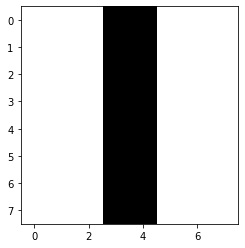

In [23]:
plt.imshow(x,cmap=plt.cm.gray_r)


In [24]:
x, x.ravel()

(array([[ 0.,  0.,  0., 16., 16.,  0.,  0.,  0.],
        [ 0.,  0.,  0., 16., 16.,  0.,  0.,  0.],
        [ 0.,  0.,  0., 16., 16.,  0.,  0.,  0.],
        [ 0.,  0.,  0., 16., 16.,  0.,  0.,  0.],
        [ 0.,  0.,  0., 16., 16.,  0.,  0.,  0.],
        [ 0.,  0.,  0., 16., 16.,  0.,  0.,  0.],
        [ 0.,  0.,  0., 16., 16.,  0.,  0.,  0.],
        [ 0.,  0.,  0., 16., 16.,  0.,  0.,  0.]]),
 array([ 0.,  0.,  0., 16., 16.,  0.,  0.,  0.,  0.,  0.,  0., 16., 16.,
         0.,  0.,  0.,  0.,  0.,  0., 16., 16.,  0.,  0.,  0.,  0.,  0.,
         0., 16., 16.,  0.,  0.,  0.,  0.,  0.,  0., 16., 16.,  0.,  0.,
         0.,  0.,  0.,  0., 16., 16.,  0.,  0.,  0.,  0.,  0.,  0., 16.,
        16.,  0.,  0.,  0.,  0.,  0.,  0., 16., 16.,  0.,  0.,  0.]))

In [25]:
#aplanamos el vector x
x = x.ravel()
x

array([ 0.,  0.,  0., 16., 16.,  0.,  0.,  0.,  0.,  0.,  0., 16., 16.,
        0.,  0.,  0.,  0.,  0.,  0., 16., 16.,  0.,  0.,  0.,  0.,  0.,
        0., 16., 16.,  0.,  0.,  0.,  0.,  0.,  0., 16., 16.,  0.,  0.,
        0.,  0.,  0.,  0., 16., 16.,  0.,  0.,  0.,  0.,  0.,  0., 16.,
       16.,  0.,  0.,  0.,  0.,  0.,  0., 16., 16.,  0.,  0.,  0.])

In [26]:
# usamos el modelo para predecir a que clase pertenece la "imagen" que representa el vector x
model.predict([x])

# Por que hay que usar corchetes? porque la clase predict() tiene que ser alimentada con una matriz y x es un vector
# utilizando los corchetes conseguimos que x sea tomado como una matriz de 1 x 64.

array([1])

In [27]:
# usamos el modelo para analizar la probabilidad de que "la imagen" anterior pertenezca a cada una de las clases
# dicho de otra manera evaluamos que probabilidad existe de que la "imagen" anterior sea cualquiera de los numeros
# que estan incluidos dentro de nuestro modelo
for i in range(9):
    print(f'{i} >> {model.predict_proba([x])[0,i]}')
#model.predict_proba([x])

0 >> 1.0334004432222429e-17
1 >> 0.9999917394908573
2 >> 5.767215789267404e-06
3 >> 3.8070279464896974e-08
4 >> 4.29600121460965e-07
5 >> 1.053818210360739e-15
6 >> 5.118301672494366e-11
7 >> 6.1882421119745e-08
8 >> 1.9636200981423507e-06


In [28]:
model.predict_proba([x])[0,1]

0.9999917394908573

In [29]:
model.predict_proba([x]).max()

0.9999917394908573

In [30]:
x

array([ 0.,  0.,  0., 16., 16.,  0.,  0.,  0.,  0.,  0.,  0., 16., 16.,
        0.,  0.,  0.,  0.,  0.,  0., 16., 16.,  0.,  0.,  0.,  0.,  0.,
        0., 16., 16.,  0.,  0.,  0.,  0.,  0.,  0., 16., 16.,  0.,  0.,
        0.,  0.,  0.,  0., 16., 16.,  0.,  0.,  0.,  0.,  0.,  0., 16.,
       16.,  0.,  0.,  0.,  0.,  0.,  0., 16., 16.,  0.,  0.,  0.])

El modelo arroja como resultado que la clase mas probable para la imagen enterior es la clase 1. <br>
En otras palabras esto significa que el modelo identifica a la imagen anterior como un numero UNO

In [31]:
# Probabilidad de cada clase (resultado del softmax):
model.predict_proba([x])

array([[0.        , 0.99999174, 0.00000577, 0.00000004, 0.00000043,
        0.        , 0.        , 0.00000006, 0.00000196, 0.        ]])

In [32]:
model.predict_proba([x]).sum()

0.9999999999999999

In [33]:
# "Score" para cada clase (antes del softmax):
model.decision_function([x])

array([[-19.68782222,  19.42326133,   7.35994846,   2.33943766,
          4.76285858, -15.06308684,  -4.27234375,   2.8252399 ,
          6.28254879,  -3.97004191]])

In [34]:
# El mismo score a mano:
model.coef_.dot(x) + model.intercept_

array([-19.68782222,  19.42326133,   7.35994846,   2.33943766,
         4.76285858, -15.06308684,  -4.27234375,   2.8252399 ,
         6.28254879,  -3.97004191])

## Ejercicios

1. Calcular el softmax a mano para un ejemplo y verificar que da igual que predict_proba.
2. Buscar en el conjunto de test una imagen mal clasificada. Graficarla. ¿Qué tan lejos estuvo de ser correctamente clasificada?
3. Con la imagen anterior, ¿qué píxeles influyeron más en la clasificación incorrecta? Intentar modificar los valores para que la clasifiación sea correcta.
4. Buscar en el conjunto de test la imagen **peor** clasificada. Graficarla. ¿Qué tan difícil es para un humano identificar el dígito?

**2. Buscar en el conjunto de test una imagen mal clasificada. Graficarla. ¿Qué tan lejos estuvo de ser correctamente clasificada?**

In [48]:
error_list = []
for i in range(360):
    if y_pred[i] != y_val[i]:
        print(f'Position:{i} y_pred: {y_pred[i]} | y_val: {y_val[i]} | Pred Prod: {model.predict_proba([X_val[i]]).max()}')
        error_list.append(i)
        # display th image of the digit
        plt.figure(1, figsize=(0.25,0.25))
        plt.imshow(X_val[i].reshape((8, 8)), cmap=plt.cm.gray_r)
        plt.axis('off')
        plt.show()
        print('-'*100)

    else: continue
print(f'Error list: {error_list}')

Position:56 y_pred: 9 | y_val: 5 | Pred Prod: 0.8017656373185899


----------------------------------------------------------------------------------------------------
Position:84 y_pred: 9 | y_val: 5 | Pred Prod: 0.5920728204952506


----------------------------------------------------------------------------------------------------
Position:94 y_pred: 4 | y_val: 7 | Pred Prod: 0.9837593251575439


----------------------------------------------------------------------------------------------------
Position:118 y_pred: 1 | y_val: 6 | Pred Prod: 0.9952821020051983


----------------------------------------------------------------------------------------------------
Position:124 y_pred: 1 | y_val: 8 | Pred Prod: 0.9718182565256394


----------------------------------------------------------------------------------------------------
Position:130 y_pred: 5 | y_val: 9 | Pred Prod: 0.9997925770761247


----------------------------------------------------------------------------------------------------
Position:181 y_pred: 9 | y_val: 5 | Pred Prod: 0.9943683464529778


----------------------------------------------------------------------------------------------------
Position:196 y_pred: 1 | y_val: 8 | Pred Prod: 0.9327402199789824


----------------------------------------------------------------------------------------------------
Position:235 y_pred: 3 | y_val: 2 | Pred Prod: 0.5037387668265426


----------------------------------------------------------------------------------------------------
Position:315 y_pred: 7 | y_val: 4 | Pred Prod: 0.6037911714036562


----------------------------------------------------------------------------------------------------
Position:331 y_pred: 8 | y_val: 1 | Pred Prod: 0.8102418992711776


----------------------------------------------------------------------------------------------------
Position:335 y_pred: 2 | y_val: 8 | Pred Prod: 0.9780730834473014


----------------------------------------------------------------------------------------------------
Error list: [56, 84, 94, 118, 124, 130, 181, 196, 235, 315, 331, 335]


In [42]:
# el digito pero clasificado es:
pred_prob_dict = {}
for i in error_list:
    pred_prob_dict[i] = model.predict_proba([X_val[i]]).max()

pred_prob_dict 

{56: 0.8017656373185899,
 84: 0.5920728204952506,
 94: 0.9837593251575439,
 118: 0.9952821020051983,
 124: 0.9718182565256394,
 130: 0.9997925770761247,
 181: 0.9943683464529778,
 196: 0.9327402199789824,
 235: 0.5037387668265426,
 315: 0.6037911714036562,
 331: 0.8102418992711776,
 335: 0.9780730834473014}

**4. Buscar en el conjunto de test la imagen peor clasificada. Graficarla. ¿Qué tan difícil es para un humano identificar el dígito?**

In [43]:
worst_pred = min(pred_prob_dict, key=pred_prob_dict.get)
print(worst_pred, pred_prob_dict[worst_pred])

235 0.5037387668265426


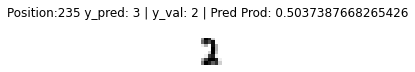

In [46]:
# display th image of the digit
plt.figure(figsize=(0.5,0.5))
plt.imshow(X_val[worst_pred].reshape((8, 8)), cmap=plt.cm.gray_r)

plt.title(f'Position:{worst_pred} y_pred: {y_pred[worst_pred]} | y_val: {y_val[worst_pred]} | Pred Prod: {model.predict_proba([X_val[worst_pred]]).max()}\n')
plt.axis('off')
plt.show()